In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
# Python SQL toolkit
import sqlite3

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
#Create the inspector and connect to the engine 
inspector = inspect(engine)

In [7]:
#get the names of tables in the db
inspector.get_table_names()

['measurement', 'station']

In [8]:
#display the list of columns in station table 
columns = inspector.get_columns('measurement')
for c in columns: 
    print (c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#display the 10 first rows of measurement table 
engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [10]:
#display the list of columns in station table 
columns = inspector.get_columns('station')
for c in columns: 
    print (c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#display the 10 first rows of station table 
engine.execute('SELECT * FROM station LIMIT 3').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
#Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
#check earlier date of the table  
early_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
early_date

('2010-01-01')

In [15]:
#check last date of the table  
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute("SELECT id, date(date) as dt from measurement where dt < date('now')order by dt DESC limit 12").fetchall()

[(2724, '2017-08-23'),
 (7635, '2017-08-23'),
 (12187, '2017-08-23'),
 (19550, '2017-08-23'),
 (2723, '2017-08-22'),
 (12186, '2017-08-22'),
 (19549, '2017-08-22'),
 (2722, '2017-08-21'),
 (7634, '2017-08-21'),
 (12185, '2017-08-21'),
 (19548, '2017-08-21'),
 (2721, '2017-08-20')]

In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_twelve_months_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(last_twelve_months_date)

2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=last_twelve_months_date).\
order_by(Measurement.date).all()
rain

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
# Save the query results (already sorted by date) as a Pandas DataFrame and drop all the NaN
rain_df = pd.DataFrame(rain).dropna()
rain_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [20]:
#set the index to date columns
rain_df.set_index("date").head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


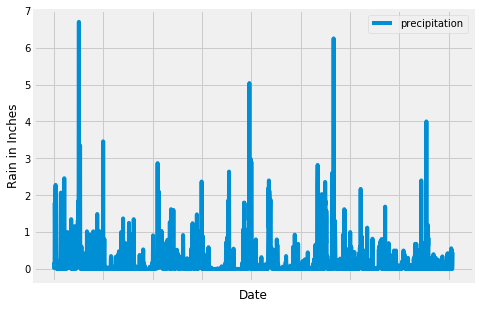

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot('date','prcp', figsize=(7,5))
plt.xlabel('Date')
plt.ylabel('Rain in Inches')
plt.legend(['precipitation'])
plt.show()

Station analysis

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe().rename(columns={'prcp':"precipitation"})
                          

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
#finding the most active station
most_active_station = active_station[0][0]
print(most_active_station)

USC00519281


In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?
lowest_temperature= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs) , func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station).all()
lowest_temperature

[(54.0, 85.0, 71.66378066378067)]

In [27]:
temperature_observation=session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_active_station).\
filter(Measurement.date > last_twelve_months_date).\
order_by(Measurement.date).all()
temperature_observation

[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

In [28]:
#save in dataframe
temp_df = pd.DataFrame(temperature_observation)
temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


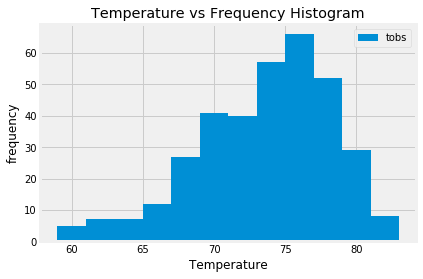

In [29]:
#plot the temp_df
plt.hist(temp_df['tobs'],bins=12)
plt.xlabel('Temperature')
plt.ylabel('frequency')
plt.title('Temperature vs Frequency Histogram')
plt.legend(['tobs'])
plt.savefig('Temperature_Frequency_Histogram.png')
plt.show()

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = '2016-08-17'
trip_end ='2017-08-18'
# function to return average
trips_temps = calc_temps(trip_start ,trip_end)
trips_temps

[(58.0, 74.61022222222222, 87.0)]

In [32]:
#save in dataframe
trips_temps_df = pd.DataFrame(trips_temps,columns=["tmin","tmax","tavg"])
trips_temps_df


,tmin,tmax,tavg
0,58.0,74.610222,87.0


In [33]:
avg_temp = trips_temps_df['tavg']
avg_temp

0    87.0
Name: tavg, dtype: float64

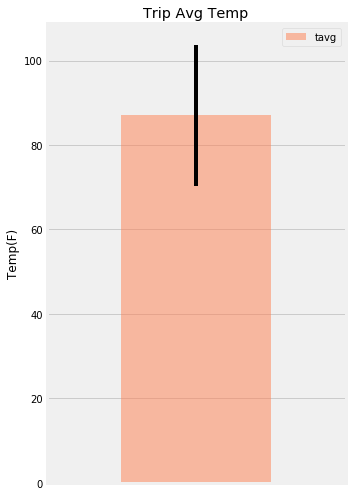

In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trips_temps_df.plot(kind='bar',y='tavg',yerr=(trips_temps_df['tmax'] - trips_temps_df['tmin']), title='Trip Avg Temp',
                        color = 'coral',alpha=0.5,figsize=(5,7))
plt.xticks(np.arange(1,1.0))
plt.ylabel('Temp(F)')
plt.tight_layout()
plt.savefig('Trip_Avg_Temp.png')
plt.show()

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_amount_of_rainfall= session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,Measurement.prcp).\
                     filter(Measurement.station == Station.station).\
                     filter(Measurement.date>='2012-02-28').\
                     filter(Measurement.date<='2012-03-05').\
                     group_by(Measurement.station).\
                     order_by(Measurement.prcp.desc()).all()
print(total_amount_of_rainfall)


[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 6.24), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.71), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.37), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.71), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.08), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.92), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.7), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, None), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]
